<br><br>

# To Catch a Burglar!

<br><br>
Our burglar tried to disguise himself in order not to get caught.  Will it work?

<img src='datasets/images/alt_face2.png'>

A sample of the image set is also shown below.

<br><br>

In [1]:
import random
import warnings

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

np.set_printoptions(suppress=True, precision=3)

warnings.filterwarnings('ignore')

<br><br>

# Loading potential suspects

Data constists of 400 64 x 64 images with ten pictures of 40 individuals each.

<br><br>

In [2]:
faces = fetch_olivetti_faces()                      # our dataset
images = faces.data                                 # 400 (64 x 64) images in 1 x 4096 format
targets = faces.target                              # values 0 through 39 identifying the person

images.shape, targets.shape

((400, 4096), (400,))

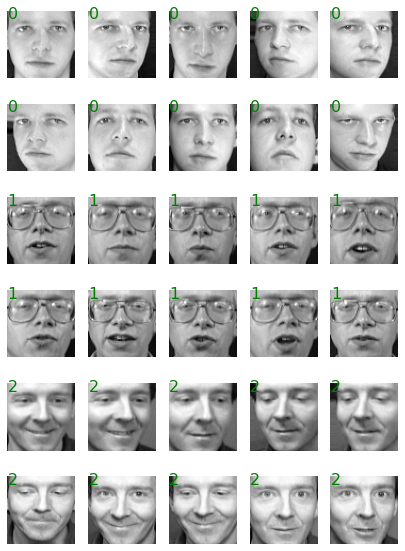

In [3]:
figure = plt.figure(figsize=(7, 10))

for idx, image in enumerate(images[:30], 1):
    ax = figure.add_subplot(6, 5, idx)
    ax.imshow(image.reshape((64, 64)), cmap='gray')
    ax.text(0, 7, str(targets[idx-1]), fontsize=16, color='green')
    plt.axis('off')

In [4]:
train_images, test_images, train_labels, test_labels = train_test_split(images, targets, test_size=0.15)
train_images.shape, test_images.shape

((340, 4096), (60, 4096))

In [5]:
input_layer  = Input(shape=(4096,), name='input_layer')
h1           = Dense(1024, activation='relu', name='hidden_layer_1', use_bias=False)(input_layer)
h1b          = BatchNormalization()(h1)
h2           = Dense(128, activation='relu', name='hidden_layer_2', use_bias=False)(h1b)
h2b          = BatchNormalization()(h2)
output_layer = Dense(40, activation='softmax', name='output_layer')(h2b)

model = Model(inputs=input_layer, outputs=output_layer)

In [6]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [7]:
history = model.fit(x=train_images, y=train_labels, epochs=20, shuffle=True)

Epoch 1/20
11/11 [==============================] - 1s 12ms/step - loss: 2.5050 - sparse_categorical_accuracy: 0.3647
Epoch 2/20
11/11 [==============================] - 0s 12ms/step - loss: 0.7784 - sparse_categorical_accuracy: 0.9029
Epoch 3/20
11/11 [==============================] - 0s 12ms/step - loss: 0.3623 - sparse_categorical_accuracy: 0.9824
Epoch 4/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1920 - sparse_categorical_accuracy: 0.9853
Epoch 5/20
11/11 [==============================] - 0s 12ms/step - loss: 0.1269 - sparse_categorical_accuracy: 0.9971
Epoch 6/20
11/11 [==============================] - 0s 14ms/step - loss: 0.0789 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
11/11 [==============================] - 0s 13ms/step - loss: 0.0701 - sparse_categorical_accuracy: 0.9912
Epoch 8/20
11/11 [==============================] - 0s 12ms/step - loss: 0.0465 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
11/11 [==============================] - 0s 1

In [8]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {accuracy:3.2f}')

2/2 [==============================] - 0s 5ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.9667
Test accuracy: 0.97


#### Predicting against a random image...

1/1 [==============================] - 0s 70ms/step
Predicted: 36,  Actual: 36


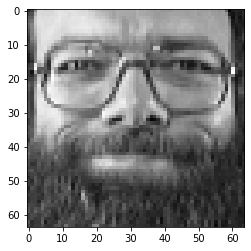

In [9]:
random.seed()
random_image_idx = random.randint(0, len(test_images)-1)     # pick one of the test set samples
random_image = test_images[random_image_idx][:, None].T      # format it so that it is: 1 x 4096 [[], [], ...]

predictions = model.predict(random_image)
actual = test_labels[random_image_idx]

plt.imshow(random_image.reshape((64, 64)), cmap='gray')
print('Predicted: {0},  Actual: {1}'.format(np.argmax(predictions), actual))

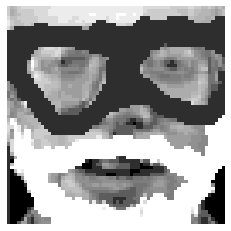

In [10]:
burglar = pltimg.imread('datasets/images/alt_face2.png')
# convert rgb colors to 8-bit

burglar = (burglar[:, :, 0]*6/256)*36 + (burglar[:, :, 1]*6/256)*6 + (burglar[:, :, 2]*6/256)

plt.imshow(burglar, cmap='gray')
plt.axis('off');

burglar = burglar.reshape((1, 4096))

In [11]:
predictions = model.predict(burglar)
actual = 1
print('Predicted: {0},  Actual: {1}'.format(np.argmax(predictions), actual))

1/1 [==============================] - 0s 13ms/step
Predicted: 1,  Actual: 1


### Did we catch the burglar?